In [1]:
# Pandas is an open-source Python Library providing high-performance data manipulation and analysis tool using its powerful data structures.
import pandas as pd
# Numpy library is the core library for computing object in Python, which deals with N-dimensional array object and tools \
# for working with these array
import numpy as np
# Matplotlib is a Python 2D plotting library which produces publication quality figures 
# in a variety of hardcopy formats and interactive environments across platforms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading dataset
df=pd.read_csv("C:/Users/chunweil/Desktop/Copy of Swaggle Data_0814.csv")


In [3]:
# randomly create binary value with 0.2 transaction rate
sold=np.random.choice([0,1],size=(498),p=[0.8,0.2])


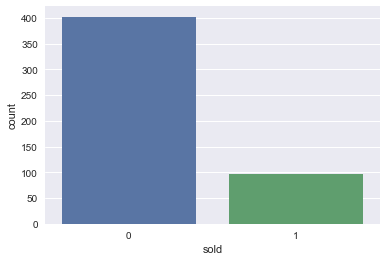

In [4]:
# Checking the target classes
sold2=pd.DataFrame({"sold":sold})
from collections import Counter
item_sold=Counter(sold2==1)
item_not_sold=Counter(sold2==0)
sns.countplot(sold2["sold"])

In [5]:
# check the statistics of orignial dataset 
df_new=df.join(sold2,how="right")
df_new.describe()

,price,msrp,sellerLocationZipCode,sold
count,498.000000,267.000000,497.000000,498.000000
mean,60.395582,259.146067,27788.977867,0.192771
std,133.930033,261.896003,21765.042901,0.394871
min,10.000000,16.000000,8889.000000,0.000000
25%,20.000000,91.000000,20007.000000,0.000000
50%,30.000000,150.000000,20814.000000,0.000000
75%,58.500000,300.000000,20814.000000,0.000000
max,2600.000000,1500.000000,95035.000000,1.000000


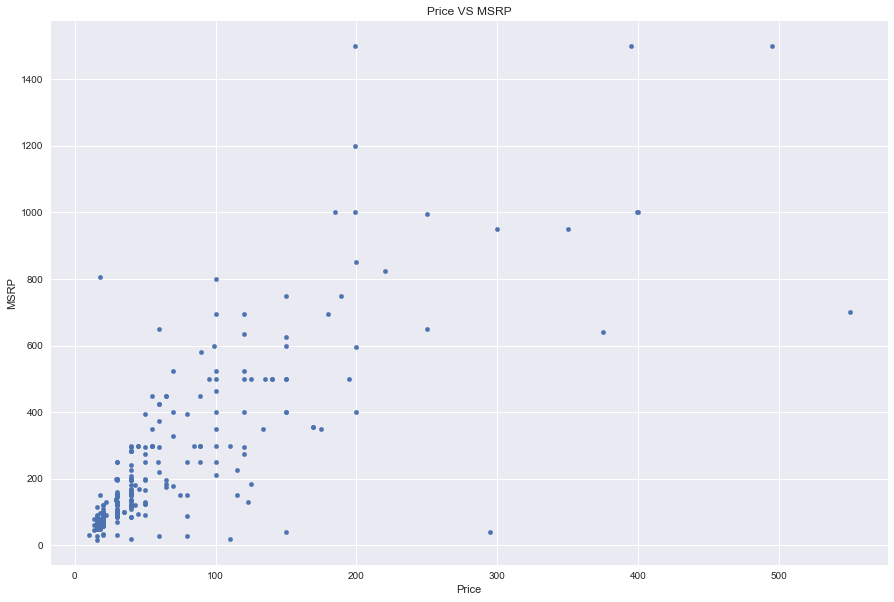

In [6]:
# EDA
# Scatter plot for Price and MSRP, it seems that there is a linear relationship between
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(df_new.price,df_new.msrp, s=20)
plt.title('Price VS MSRP')
plt.xlabel('Price')
plt.ylabel('MSRP')
plt.show()

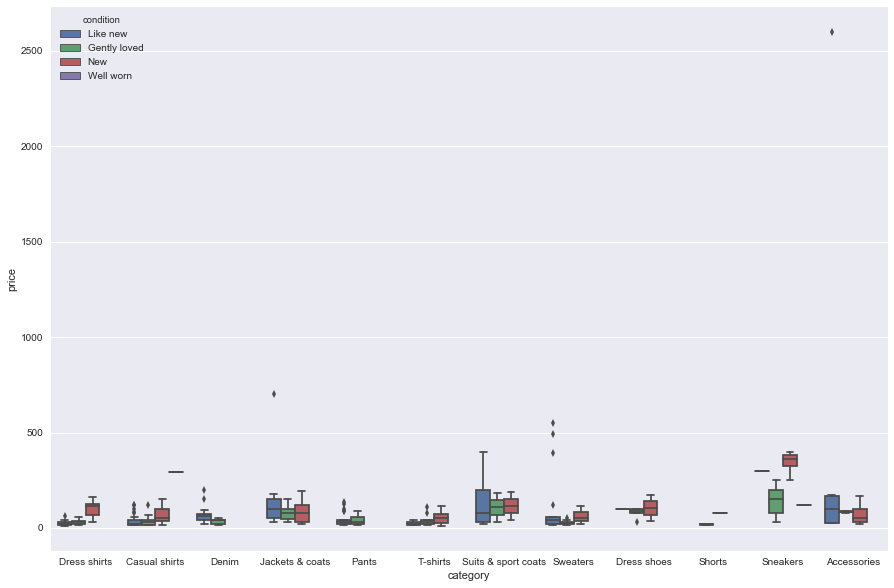

In [7]:
# plot the boxplot of price and category by condition
# there is a outlier at top right
plt.figure(figsize=(15,10))
sns.boxplot(x=df_new.category,y=df_new.price,hue=df_new.condition,data=df_new)

In [8]:
# remove the outlier
out=df_new.price>=2000
df_new=df_new.drop(df_new.index[out])

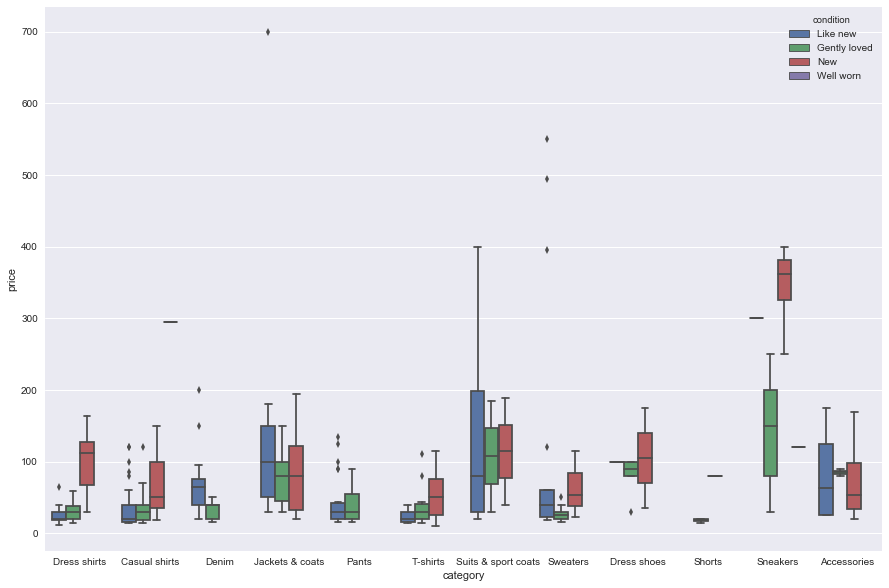

In [9]:
# Based on the boxplot after dropping outlier, we can observe that for some categories, such as Jacket&Coats, Suit& Sport Coats
# the price with like new condition is higher than that with New condition.(probabily it is because there are some luxury brand in these categories)
plt.figure(figsize=(15,10))
sns.boxplot(x=df_new.category,y=df_new.price,hue=df_new.condition,data=df_new)

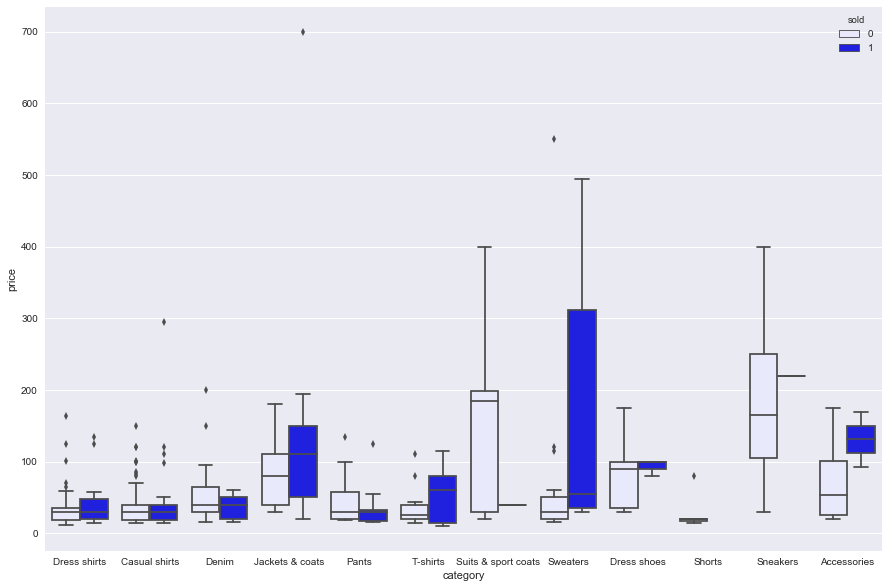

In [10]:
# we can also see the price range for sucessful transaction 
# Take sneaker as example, an item with price range between $175~$225 is more likely to be sold 
plt.figure(figsize=(15,10))
sns.boxplot(x=df_new.category,y=df_new.price,hue=df_new.sold,data=df_new,color="b")

In [11]:
df_new.columns
print pd.unique(df_new.category)
print pd.unique(df_new.condition)

['Dress shirts' 'Casual shirts' 'Denim' 'Jackets & coats' 'Pants'
 'T-shirts' 'Suits & sport coats' 'Sweaters' 'Dress shoes' 'Shorts'
 'Sneakers' 'Accessories']
['Like new' 'Gently loved' 'New' 'Well worn']


In [12]:
# Convert categorical value to numerical by using One-Hot encoding on categorical value
df_swaggle=pd.get_dummies(df_new,columns=['category',"condition"])
df_swaggle.columns

Index([u'productId', u'brand', u'size', u'price', u'msrp', u'discount off',
       u'sellerLocationCity', u'sellerLocationState', u'sellerLocationZipCode',
       u'sold', u'category_Accessories', u'category_Casual shirts',
       u'category_Denim', u'category_Dress shirts', u'category_Dress shoes',
       u'category_Jackets & coats', u'category_Pants', u'category_Shorts',
       u'category_Sneakers', u'category_Suits & sport coats',
       u'category_Sweaters', u'category_T-shirts', u'condition_Gently loved',
       u'condition_Like new', u'condition_New', u'condition_Well worn'],
      dtype='object')

In [13]:
# Create dataset for further analysis
df_swaggle=df_swaggle.drop(['productId','brand','size','sellerLocationCity', 'sellerLocationState', 'sellerLocationZipCode'],axis=1)

In [14]:
# Data Cleaning 
df_swaggle['discount off']=df_swaggle['discount off'].replace("#DIV/0!",0)
df_swaggle['discount off']=df_swaggle['discount off'].astype(np.float)
df_swaggle['msrp']=df_swaggle['msrp'].replace(np.nan,0)
print df_swaggle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 0 to 497
Data columns (total 20 columns):
price                           497 non-null int64
msrp                            497 non-null float64
discount off                    497 non-null float64
sold                            497 non-null int32
category_Accessories            497 non-null uint8
category_Casual shirts          497 non-null uint8
category_Denim                  497 non-null uint8
category_Dress shirts           497 non-null uint8
category_Dress shoes            497 non-null uint8
category_Jackets & coats        497 non-null uint8
category_Pants                  497 non-null uint8
category_Shorts                 497 non-null uint8
category_Sneakers               497 non-null uint8
category_Suits & sport coats    497 non-null uint8
category_Sweaters               497 non-null uint8
category_T-shirts               497 non-null uint8
condition_Gently loved          497 non-null uint8
condition_Like new      

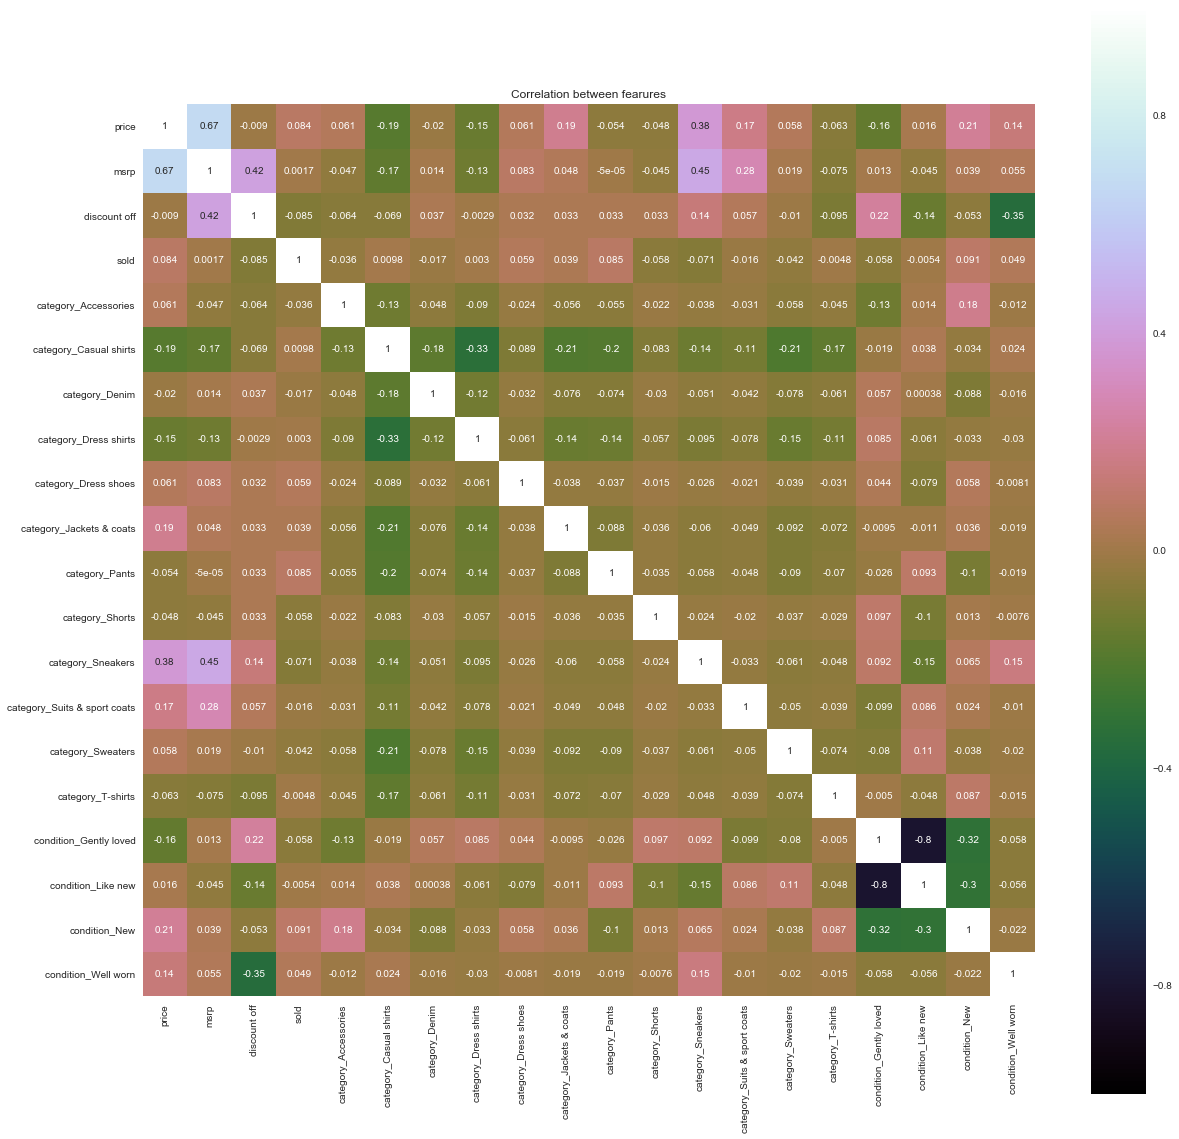

In [15]:
# Correlation matrix 
# the heatmap is a appropriate way to get a quick overview of features relationship

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
correlation=df_swaggle.corr()
plot= plt.figure(figsize=(20,20))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.title('Correlation between fearures')
plot.savefig('Correlation Matrix')

In [24]:
# feature correlation with sold variable,it is interesting dicount off have negative correlation with sold
a=pd.DataFrame(correlation)
correlation_sold= pd.DataFrame(a["sold"])
correlation_sold.sort_values(by = 'sold', ascending = False)

,sold
sold,1.000000
condition_New,0.091214
category_Pants,0.084660
price,0.084209
category_Dress shoes,0.058916
condition_Well worn,0.049405
category_Jackets & coats,0.038542
category_Casual shirts,0.009817
category_Dress shirts,0.003010
msrp,0.001697


In [17]:
# splitting to training data and test data 
from sklearn.model_selection import train_test_split
train,test = train_test_split(df_swaggle,test_size=0.20,random_state=7)

# splitting into training and cv for cross-validation
predictors=train.columns.drop(["sold"])
print(predictors)
X=train.loc[:,predictors]
x_train,x_cv,y_train,y_cv=train_test_split(X,train.sold)

# Standardization 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() # feature scaling 
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_cv=scaler.transform(x_cv)

Index([u'price', u'msrp', u'discount off', u'category_Accessories',
       u'category_Casual shirts', u'category_Denim', u'category_Dress shirts',
       u'category_Dress shoes', u'category_Jackets & coats', u'category_Pants',
       u'category_Shorts', u'category_Sneakers',
       u'category_Suits & sport coats', u'category_Sweaters',
       u'category_T-shirts', u'condition_Gently loved', u'condition_Like new',
       u'condition_New', u'condition_Well worn'],
      dtype='object')


In [18]:
# Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB as GB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
# Model Evaluation Metrics
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
models=["RandomForestClassifier","Gaussian Naive Bays","KNN","Logistic_Regression","Support_Vector"]
Classification_models =[RandomForestClassifier(n_estimators=100),GB(),knn(n_neighbors=5),LogisticRegression(),SVC()]

In [19]:
# Create a function for classification
def classification_model(model): 
    model.fit(x_train,y_train.values.ravel())
    pred=model.predict(x_cv)
    
    #pred_prob=model.predict_proba(x_test)
    accuracy=accuracy_score(y_cv,pred)
    #CM=confusion_matrix(test_y,pred)
    #roc_score=roc_score(test_y,pred)
    #CR=classification_report(test_y,pred)
    #pr=precision_score(test_y,pred)
    return accuracy

In [26]:
# Evaluate performance of original ML models 
Accuracy=[]
seed=np.random.seed(1)
for model in Classification_models:
    ar=classification_model(model)
    Accuracy.append(ar)

In [30]:
print Accuracy

[0.72999999999999998, 0.20000000000000001, 0.81999999999999995, 0.81999999999999995, 0.81000000000000005]


In [31]:
# Table for comparison with multiple algorithmns, KNN and Logistic Regression machine perform very well
ML_important_features = pd.DataFrame(
    { "Classification Model" :models,
     "Accuracy with important features":Accuracy
    })
    
ML_important_features.sort_values(by="Accuracy with important features",ascending=False).reset_index(drop=True)

,Accuracy with important features,Classification Model
0,0.82,KNN
1,0.82,Logistic_Regression
2,0.81,Support_Vector
3,0.73,RandomForestClassifier
4,0.20,Gaussian Naive Bays
